In [11]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
df = pd.read_csv(url, compression='gzip')

In [12]:
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [14]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


# **1.2. Exploration Techniques Applied**

# 2.1. Generating Summary Statistics (Non-Graphical EDA)

Task A: Overall Descriptive Statistics


In [15]:
mean_val = df['traffic_volume'].mean()
median_val = df['traffic_volume'].median()
mode_val = df['traffic_volume'].mode()[0]
std_val = df['traffic_volume'].std()
range_val = df['traffic_volume'].max() - df['traffic_volume'].min()

print("\nDescriptive Statistics for traffic_volume")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Range (max - min): {range_val}")


Descriptive Statistics for traffic_volume
Mean: 3259.82
Median: 3380.00
Mode: 353
Standard Deviation: 1986.86
Range (max - min): 7280


Answers of Analysis Questions:


---
* 1.The median is 3380.00 and the mean is 3259.82 ,we note that the median is greater than the mean this signifies that the average traffic values are generally higher than the central value represented by the mean.
* 2.Since the mean is less than the median the distribution is left-skewed (negatively skewed).




Task B: Skewness and Kurtosis

In [16]:
skew_val = df['traffic_volume'].skew()
kurt_val = df['traffic_volume'].kurt()
print(f"\nSkewness: {skew_val:.3f}")
print(f"Kurtosis: {kurt_val:.3f}")


Skewness: -0.089
Kurtosis: -1.309


Answers of Analysis Questions:


---



*  1. The skewness value is negativethis is mean the distribution is slightly skewed to the left, and this is consistent with the expectations from task A
* 2. The value of kurtosis which is less than zero means that the distribution is less flat than the normal distribution, it is lighter in tails lightly-tiled and tends to be flatter.



Task C: Multivariate Analysis via Grouping

In [17]:
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
print(weather_stats)


                     mean          std
weather_main                          
Clouds        3618.449749  1906.202879
Haze          3502.101471  1873.511057
Rain          3317.905501  1982.228705
Drizzle       3290.727073  1997.901830
Smoke         3237.650000  1978.015893
Clear         3055.908819  1987.101411
Snow          3016.844228  1900.185883
Thunderstorm  3001.620890  1988.296012
Mist          2932.956639  2073.025670
Fog           2703.720395  2125.525863
Squall        2061.750000  1950.070490


Answers of Analysis Questions:


---



* 1. Highest mean weather condition Clouds, this means that traffic is highest on cloudy days compared to other weather conditions.
* 2. Highest Standard Deviation weather  Fog, this indicates that traffic on foggy days is very unstable, sometimes high and sometimes very low.



# **2.2. Visualizing Distributions and Variability (Graphical EDA)**

Task A: Histogram for Distribution


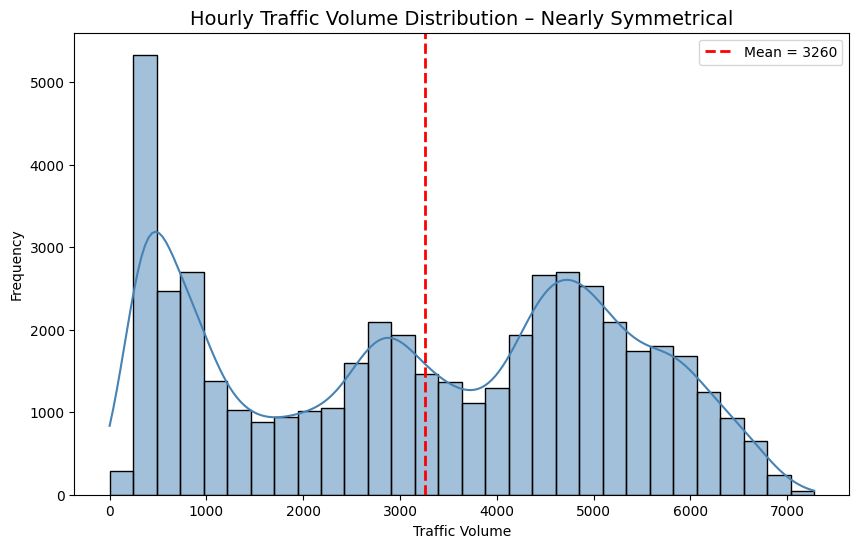

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='steelblue')

mean_val = df['traffic_volume'].mean()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.0f}')

plt.title("Hourly Traffic Volume Distribution – Nearly Symmetrical", fontsize=14)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Task B: Box Plot for Dispersion

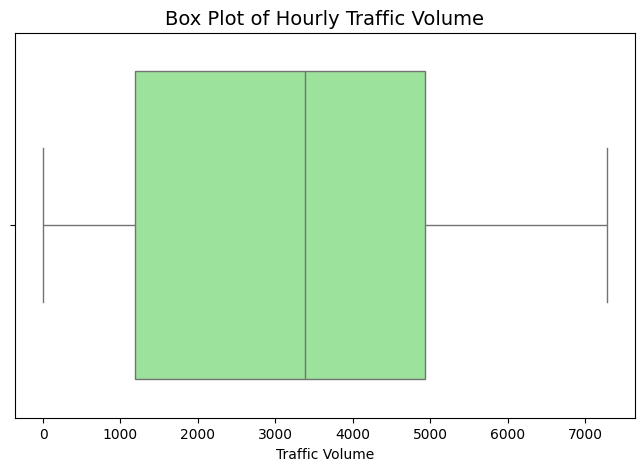

3740.0


In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['traffic_volume'], color='lightgreen')

plt.title("Box Plot of Hourly Traffic Volume", fontsize=14)
plt.xlabel("Traffic Volume")
plt.show()

Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Answers of Analysis Questions:


---


* The Interquartile Range is 3740.0, this indicates that 50% of the traffic volume values fall within a wide range, showing high dispersion and considerable variability in traffic volume across different periods.


Task C: Grouped Box Plots (holiday vs. non-holiday)

/tmp/ipython-input-3507776834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Set2')


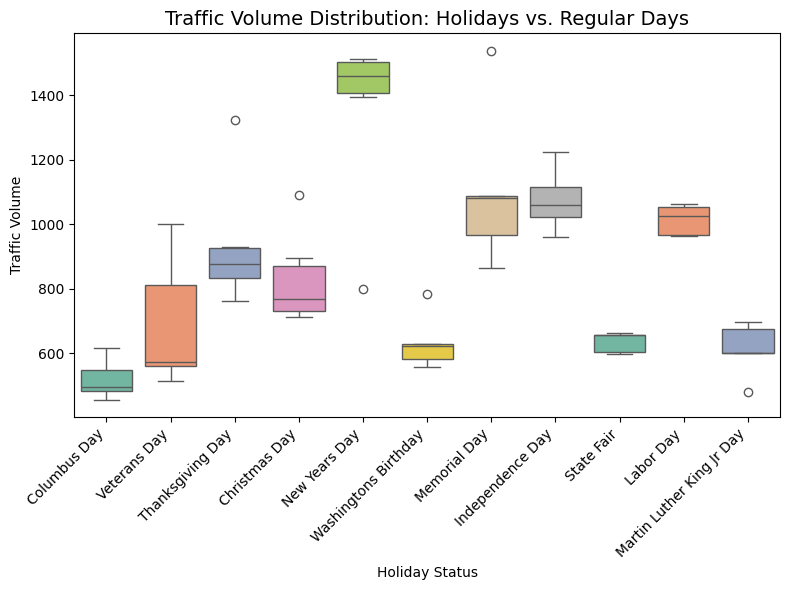

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Set2')

plt.title("Traffic Volume Distribution: Holidays vs. Regular Days", fontsize=14)
plt.xlabel("Holiday Status")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **2.3. Visualizing Correlation**


Task A: Correlation Matrix and Heatmap

Correlation Matrix:
                 traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.130299  0.004714  0.000733    0.067054
temp                  0.130299  1.000000  0.009069 -0.019755   -0.101976
rain_1h               0.004714  0.009069  1.000000 -0.000090    0.004818
snow_1h               0.000733 -0.019755 -0.000090  1.000000    0.027931
clouds_all            0.067054 -0.101976  0.004818  0.027931    1.000000


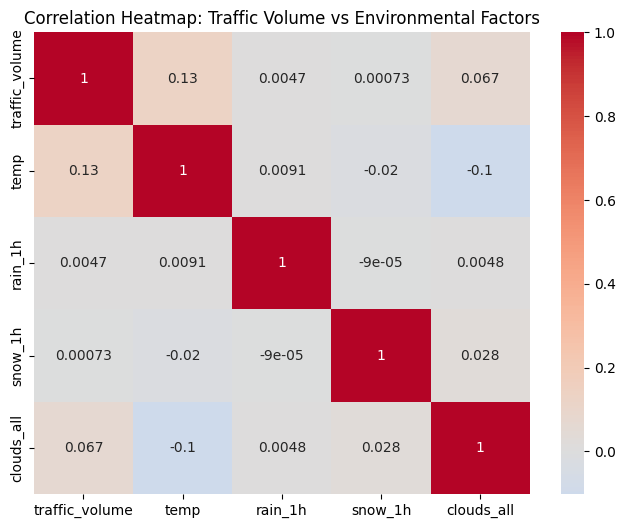

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

corr_matrix = df[num_cols].corr()

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: Traffic Volume vs Environmental Factors")
plt.show()


Task B: Interpretation and Paradox



---


The variable temp has the strongest absolute correlation 0.13 with traffic_volume, and the correlation is positive but weak.


Discussion Causation
---


* Even if temperature is related to higher traffic volume, it doesn’t mean that
temperature causes more traffic.
There might be another factor, such as time of day or season, that affects both.
So, the correlation happens because of a common external factor, not a direct cause.

# **2.4. Interactive Charting Tools (Plotly/Altair) - Optional/Bonus**


In [22]:
import plotly.express as px

fig = px.scatter(
    df,
    x='temp',
    y='traffic_volume',
    color='weather_main',
    hover_data=['weather_description'],
    title='Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow',
    labels={'temp': 'Temperature (°K)', 'traffic_volume': 'Hourly Traffic Volume'}
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()
